#**Analyzing Your  Live Amazon Data**

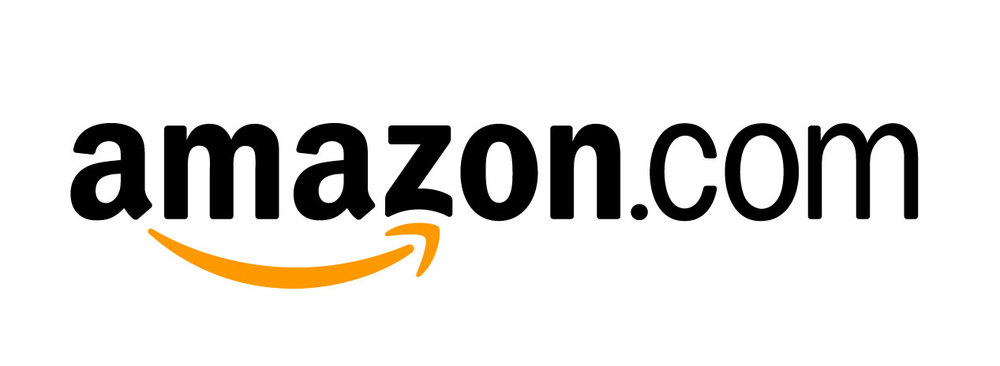

Amazon holds **47%** market share of the e-commerce industry and chances are you are one of the customers making Amazon a great company. 

Each month, about **197 million** people visit Amazon for one or other transaction and there is no doubt Amazon has a lot of data which is likely to include my data and your data sa well.

Likely, Amazon gives us access to our personal data to some extent.

In this tutorial, we will learn how to get our own data from Amazon and analyze it using Python to understand our behaviuor on Amazon.

Some of the activities that we will perform in this tutorial include:

* Extracting our data from the Amazon platform.
* Load and clean our data.
* Find out how much we spend in a particular year
* Find out how much we spend on average on Amazon
* Find out our Maximum spend in a year
* Find out our Minimum spend in a year
* Find out on average how much we spend on Amazon
* Find out which item cost the highest amount
* Find out all the items we have purchased so far
* Use Seaborn to Visualise our daily order
* Use Seaborn to visualise our Monthly orders

##**Downloading Amazon Order History Data**

Depending on the country you are living in, you can visit your respective amazon website (e.g. amazon.com, amazon.in, amazon.ca, etc.)to download your data.

STEPS:

* Visit [amazon](https://www.amazon.com/gp/b2b/reports?ref_=ya_d_l_order_reports&)

* Login to your account
* Navigate to **Accounts and Lists** at the top right corner
* Navigate to **Ordering and Shopping Preferences** >> **Download order reports**.

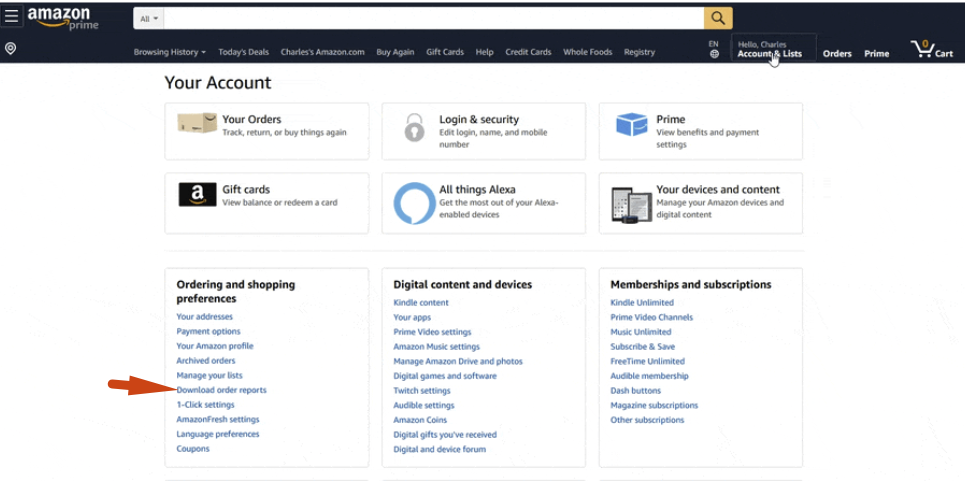

There are four different kinds of reports you can download from here. We will be using the **Orders and shipments report**. 

* Select the **Report Type** to be **Items**
* **Start Date** and **End Date**: Your own prefernces
* **Report Name**: Give a name to your report here (it's optional)

* Click on **Request Report**

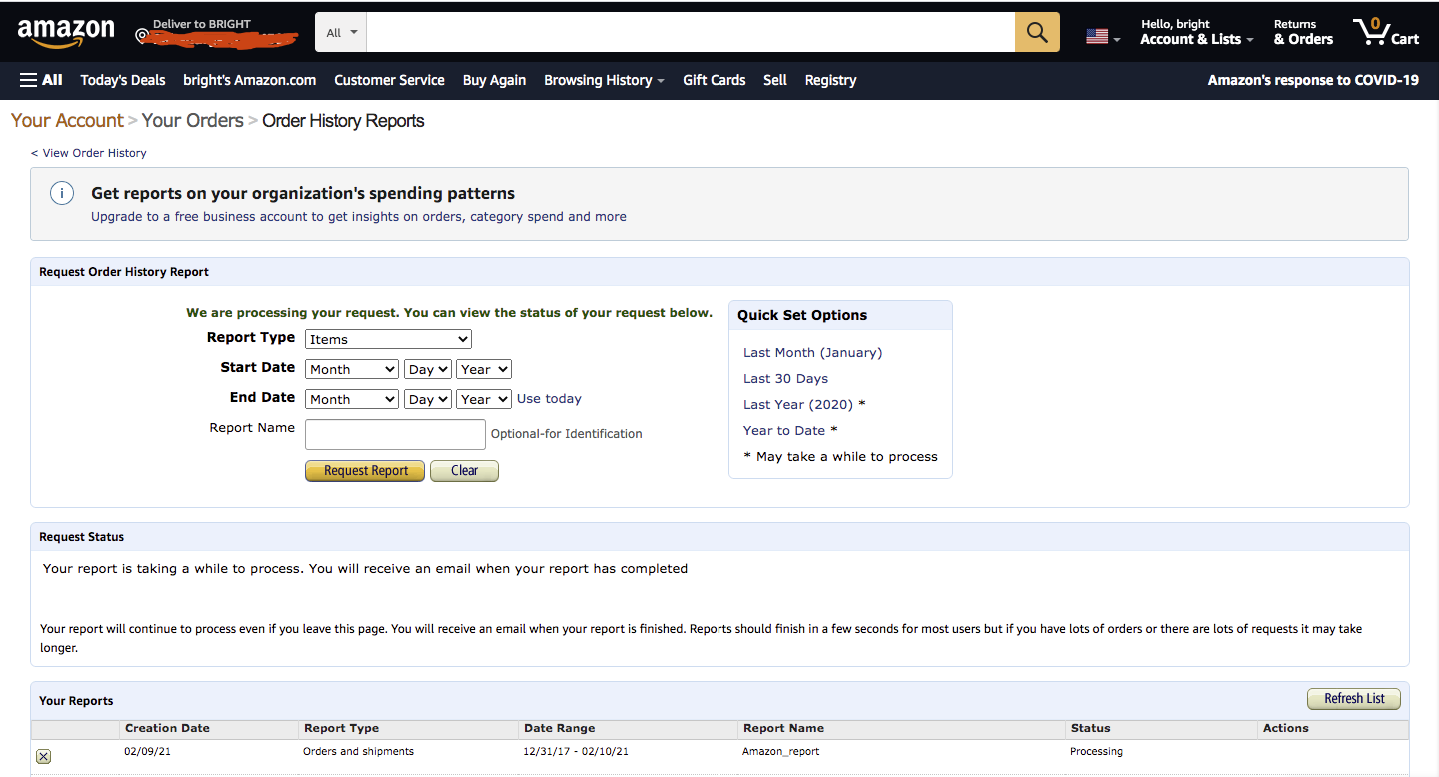

<br>

<br>

* When your data is ready, you will receive an email similar to what you see below to download it.

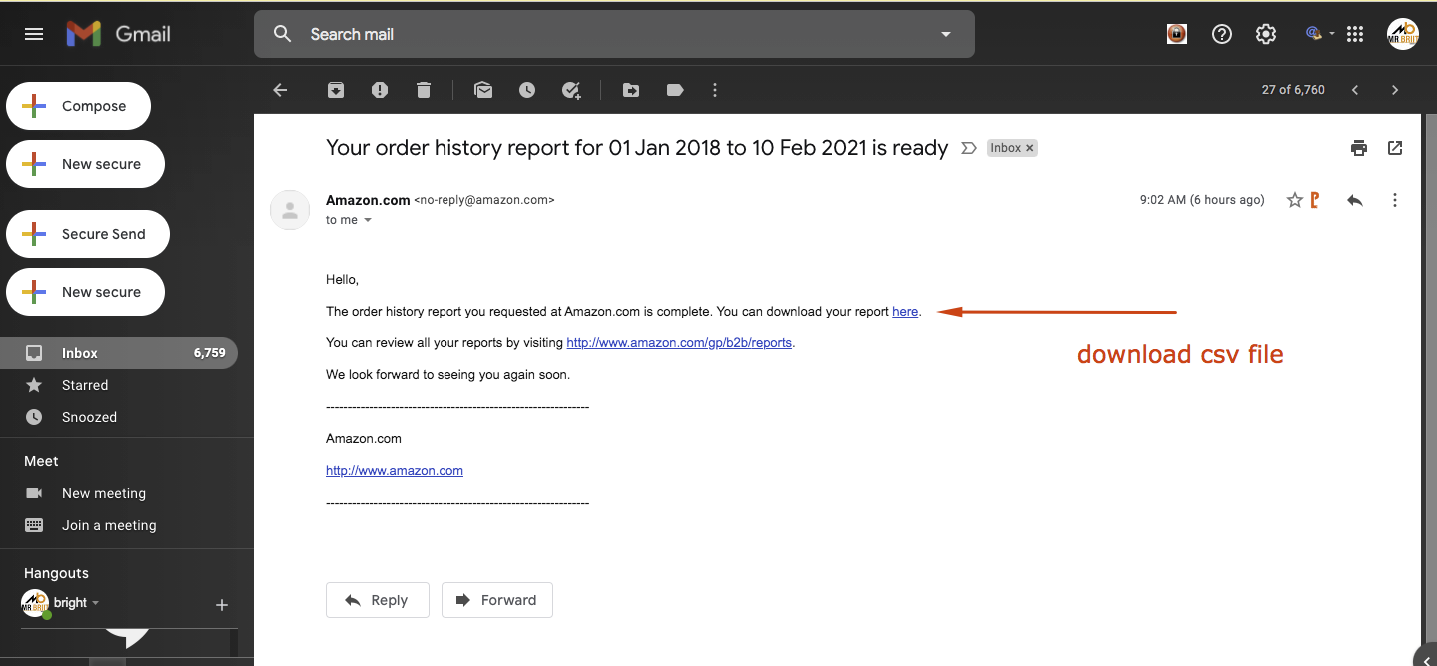

Now that you have your csv file ready, you can load it with Python and perform some analysis on it.

###**Alternative and Recommended way:**

You can use this chrome extension to download the data.

**Steps**:

* Install the [chrome extension](https://chrome.google.com/webstore/detail/amazon-order-history-repo/mgkilgclilajckgnedgjgnfdokkgnibi/related)
* Depending on the country you are, go to the appropriate amazon website (e.g. amazon.com, amazon.in, amazon.ca, etc.)
* After logging in to your amazon account, navigate to **Accounts & Lists** >> **Your Orders**.
* Once you get here, click on the chrome plugin that we installed earlier. This will display the data for the availabl years. Select any year of your choice to download csv file.

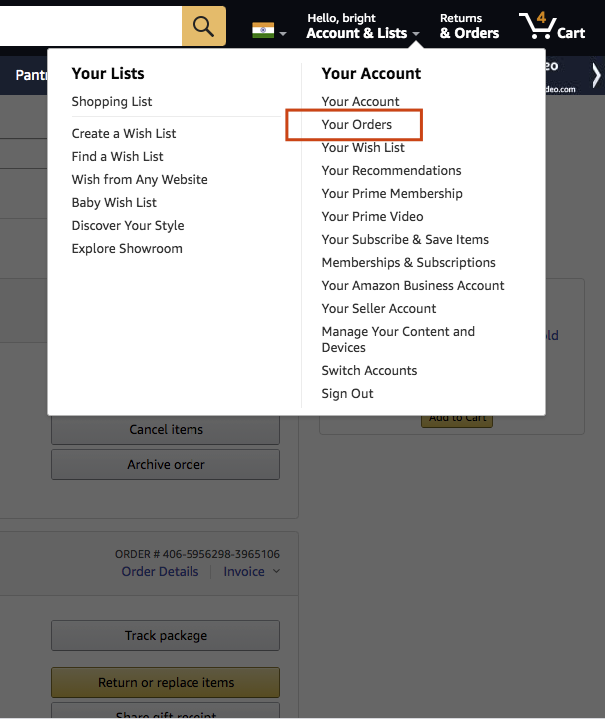

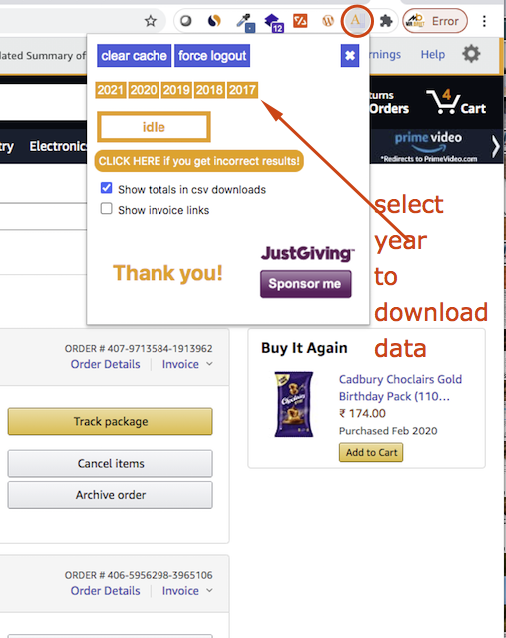

<br>

**Download and save your data**



---

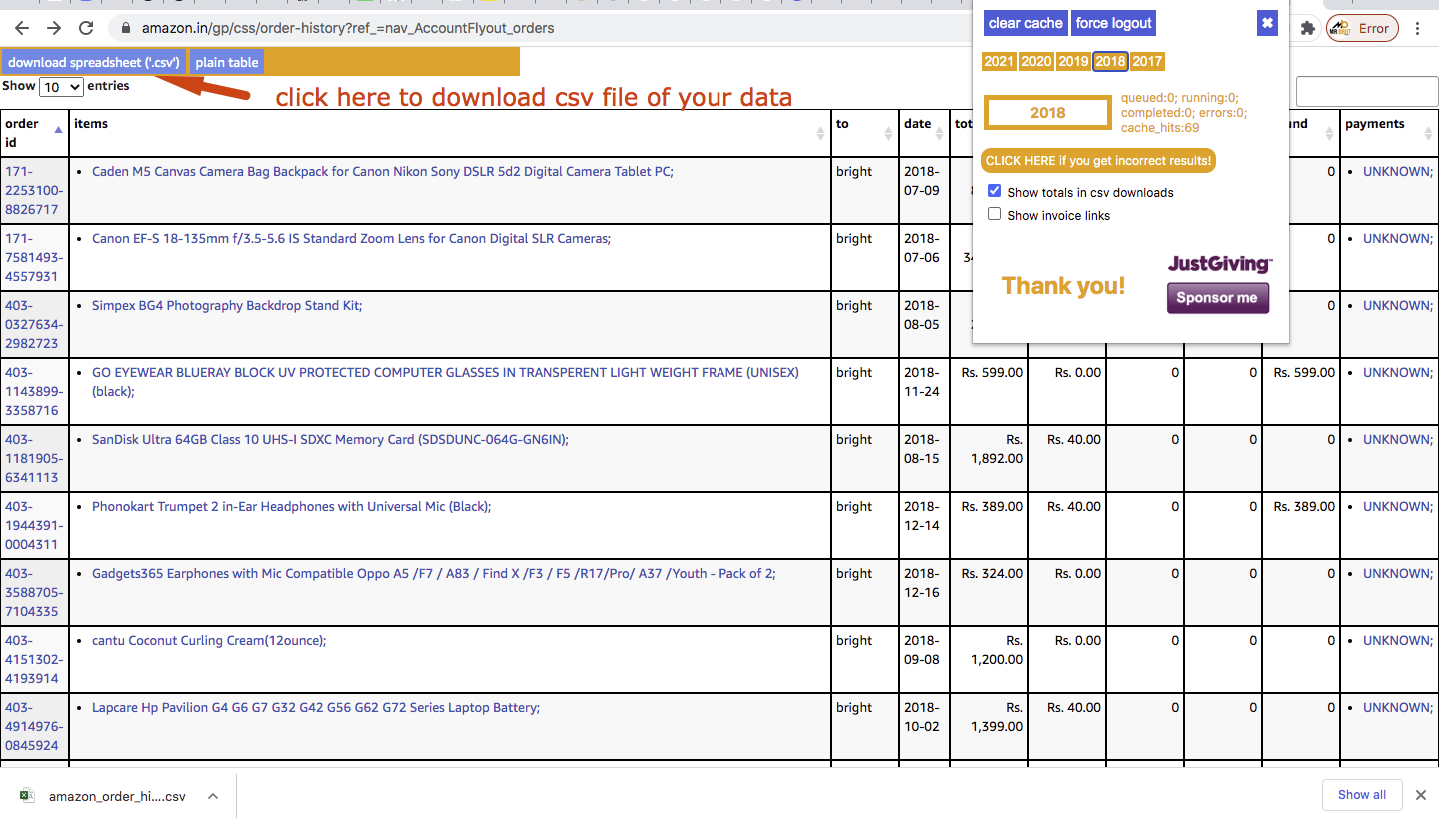

In [3]:
import pandas as pd

amz_data = pd.read_csv('amazon_order_history.csv')

amz_data

,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments
0,407-4284473-8193947,Epson 6641 Black Ink Bottle - 70 ml;,Dharna Jadeja,2019-12-20,Rs.598.00,Rs. 0.00,0,0,0,0,UNKNOWN;
1,406-0751105-4487538,Asbob® Electric Rechargeable Heating Pad Hot B...,Nakuk jadeja,2019-11-15,Rs.299.00,Rs. 0.00,0,0,0,0,UNKNOWN;
2,406-2461484-1883503,JBL Tune 205 Pure Bass Metal Earbud Headphones...,Nakuk jadeja,2019-10-30,Rs.747.00,Rs. 0.00,0,0,0,0,UNKNOWN;
3,406-0553980-7913917,Otterbox iPhone X Symmetry Graphic Series Case...,Nakuk jadeja,2019-10-30,"Rs.1,900.00",Rs. 0.00,0,0,0,0,UNKNOWN;
4,406-2358982-6178707,Let Us Python;,Nakuk jadeja,2019-10-15,Rs.202.00,Rs. 0.00,0,0,0,0,UNKNOWN;
5,171-0435809-8315548,Krisah® 18 Number Foil Balloon(XL Size) 32 inc...,Nakuk jadeja,2019-08-19,Rs.299.00,Rs. 0.00,0,Rs. 30.00,0,0,UNKNOWN;
6,406-9920246-6639549,Couture Toys Doraemon Soft Toy for Kids (Blue);,Nakuk jadeja,2019-08-13,Rs.299.00,Rs. 0.00,0,0,0,0,UNKNOWN;
7,406-6791295-4867552,M7 iPhone x Glitter Liquid Moving Case with Go...,Nakuk jadeja,2019-07-25,Rs.499.00,Rs. 0.00,0,0,0,0,UNKNOWN;
8,408-2432621-9337109,Vodafone Idea Prime Plan;,0,2019-07-06,Rs.0.00,Rs. 0.00,0,0,0,0,UNKNOWN;
9,order id,items,to,date,total,shipping,shipping_refund,gift,VAT,refund,payments


In [ ]:
amz_data.shape

(32, 10)

In [ ]:
amz_data.isnull().sum()

order id    0
items       0
to          0
date        0
 total      0
postage     0
gift        0
VAT         0
refund      0
payments    0
dtype: int64

In [ ]:
amz_data = amz_data.fillna(0)

In [ ]:
amz_data.isnull().sum()

order id    0
items       0
to          0
date        0
 total      0
postage     0
gift        0
VAT         0
refund      0
payments    0
dtype: int64

In [ ]:
amz_data[' total ']= amz_data[' total '].str.replace('Rs.','')
amz_data

,order id,items,to,date,total,postage,gift,VAT,refund,payments
0,403-3588705-7104335,Gadgets365 Earphones with Mic Compatible Oppo ...,bright,16/12/18,324.00,Rs. 0.00,0,0,0,UNKNOWN;
1,403-1944391-0004311,Phonokart Trumpet 2 in-Ear Headphones with Uni...,bright,14/12/18,389.00,Rs. 40.00,0,0,Rs. 389.00,UNKNOWN;
2,403-7071530-3432310,Vast Zero Power Anti Glare Clubmaster Women's ...,bright,07/12/18,595.00,Rs. 40.00,0,0,0,Visa ending in 4760: 8 December 2018: Rs. 59...
3,408-4510123-1924335,Ten Mighty Pens;,bright,06/12/18,182.00,Rs. 89.00,0,0,0,Visa ending in 4760: 7 December 2018: Rs. 18...
4,403-1143899-3358716,GO EYEWEAR BLUERAY BLOCK UV PROTECTED COMPUTER...,bright,24/11/18,599.00,Rs. 0.00,0,0,Rs. 599.00,UNKNOWN;
5,408-3772045-1061119,Kemei KM-329 by FZCTECH Hair Brush Auto Fast H...,bright,22/10/18,328.00,Rs. 0.00,0,0,0,UNKNOWN;
6,404-9376809-1589923,H&B Jute Bags - Multipurpose Waterproof Jute L...,kyeremeh bright,16/10/18,207.00,Rs. 59.00,0,0,0,UNKNOWN;
7,404-3849123-7643564,M.G.R - Infocus Snap 4 HD+ 9H Hardness Toughen...,kyeremeh bright,16/10/18,189.00,Rs. 40.00,0,0,0,UNKNOWN;
8,404-3551917-8884308,Ac Aditi CREATIONS BACKCOVER 15 INFOCUS SNAP 4;,kyeremeh bright,16/10/18,177.11,Rs. 0.00,0,0,0,UNKNOWN;
9,408-1405724-5417929,UrbanwhiZ Emosis Men Stylish Black Brown Colou...,bright,10/10/18,0.00,Rs. 0.00,0,0,0,UNKNOWN;


In [ ]:
amz_data[' total ']=amz_data[' total '].str.replace(',','').astype('float')

In [ ]:
# amz_data=amz_data.drop(32)

In [ ]:
# amz_data

<br>

**How much did I spend in 2018?**

In [ ]:
amz_data[' total '].sum()

125347.11

<br>

**On average, how much do I spend on Amazon?**

In [ ]:
amz_data[' total '].mean()

597.0

<BR>

**What is the minimum amount I spent in 2018?**

In [ ]:
amz_data[' total '].min()

0.0

<BR>

**What is the maximum amount I spent in 2018?**

In [ ]:
amz_data[' total '].max()

37999.0

**Which item cost me the highest amount?**

In [ ]:
amz_data[amz_data[' total ']==37999.0][['items',' total ']]

,items,total
29,Canon EF-S 18-135mm f/3.5-5.6 IS Standard Zoom...,37999.0


<br>

**Let's find out all the items I purchased in 2018**

In [ ]:
amz_data['items']

0     Gadgets365 Earphones with Mic Compatible Oppo ...
1     Phonokart Trumpet 2 in-Ear Headphones with Uni...
2     Vast Zero Power Anti Glare Clubmaster Women's ...
3                                     Ten Mighty Pens; 
4     GO EYEWEAR BLUERAY BLOCK UV PROTECTED COMPUTER...
5     Kemei KM-329 by FZCTECH Hair Brush Auto Fast H...
6     H&B Jute Bags - Multipurpose Waterproof Jute L...
7     M.G.R - Infocus Snap 4 HD+ 9H Hardness Toughen...
8      Ac Aditi CREATIONS BACKCOVER 15 INFOCUS SNAP 4; 
9     UrbanwhiZ Emosis Men Stylish Black Brown Colou...
10              Amazon Pay balance: Money (Cash-load); 
11    UrbanwhiZ Emosis Men Stylish Black Brown Colou...
12    Lapcare Hp Pavilion G4 G6 G7 G32 G42 G56 G62 G...
13    Cantu Shea Butter Moisturizing Curl Activator ...
14               cantu Coconut Curling Cream(12ounce); 
15              Amazon Pay balance: Money (Cash-load); 
16    IAS CHAOBA clipper & Trimmer Professional Elec...
17    QAWACHH Brand iPhone Handfree(Earphones)fo

**Did I buy anything twice**?

In [ ]:
amz_data[amz_data['items'].duplicated()]['items']

11    UrbanwhiZ Emosis Men Stylish Black Brown Colou...
15              Amazon Pay balance: Money (Cash-load); 
23              Amazon Pay balance: Money (Cash-load); 
Name: items, dtype: object

We can see that I reordered the same item, ***UrbanwhiZ Emosis Men Stylish Black Brown Colou...*** . Also, ***Amazon Pay balance: Money (Cash-load)*** appeared because it happened several times when i purchase an item with my amazon pay balance.

<br>

##**Time Series Analysis:** Analyzing Amazon Spending Over Time

In [ ]:
amz_data['date'] = pd.to_datetime(amz_data['date'] )
amz_data.head()

,order id,items,to,date,total,postage,gift,VAT,refund,payments
0,403-3588705-7104335,Gadgets365 Earphones with Mic Compatible Oppo ...,bright,2018-12-16,324.0,Rs. 0.00,0,0,0,UNKNOWN;
1,403-1944391-0004311,Phonokart Trumpet 2 in-Ear Headphones with Uni...,bright,2018-12-14,389.0,Rs. 40.00,0,0,Rs. 389.00,UNKNOWN;
2,403-7071530-3432310,Vast Zero Power Anti Glare Clubmaster Women's ...,bright,2018-07-12,595.0,Rs. 40.00,0,0,0,Visa ending in 4760: 8 December 2018: Rs. 59...
3,408-4510123-1924335,Ten Mighty Pens;,bright,2018-06-12,182.0,Rs. 89.00,0,0,0,Visa ending in 4760: 7 December 2018: Rs. 18...
4,403-1143899-3358716,GO EYEWEAR BLUERAY BLOCK UV PROTECTED COMPUTER...,bright,2018-11-24,599.0,Rs. 0.00,0,0,Rs. 599.00,UNKNOWN;


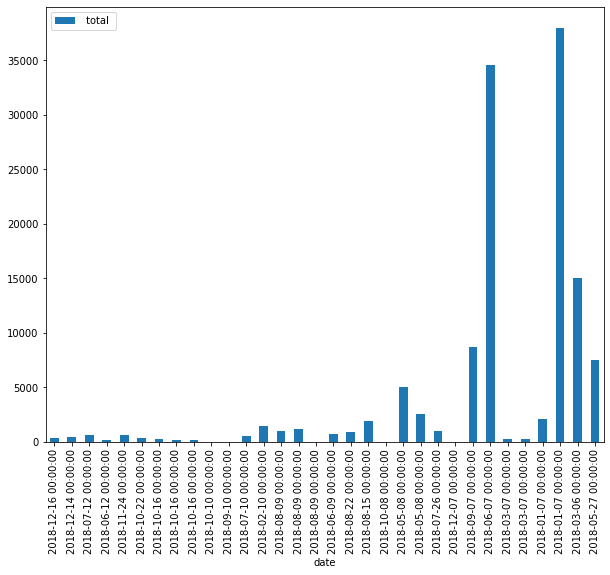

In [ ]:
amz_data.plot.bar(x='date', y=' total ', rot=90, figsize= (10,8))

Now we have the **order** and the **total amount** shown on the plot above. We can notice that I did most of my orders in June(06), September(09), January(01),March(03) and May(05).

We can also notice that, the items that were purchased in a single day are all having their individual bars, for example: three items were ordered on 2018-10-16 and they all have been plotted on a differnt bars. Instead, we can simplify this by visualising the amount that was spent in a particular day by combining all orders in that particular day together and not just individual orders.

#**Identify Daily Orders**

We can achieve this using the Pandas ***df.groupby()*** method.

We will first group our data by the order ***'date'*** so that all the orders that share the same date are counted in a single row. For example, all the three items that were counted differently will be grouped together in a single row and counted once. So basically, we just want one row for orders placed on 1st january, one row for oders placed on 2nd january, one row for orders placed on 3rd january and so on...

Then we want to find the total charged in say 16 November(i.e.2018-10-16) row to be the sum total of the three orders placed that day.

In [ ]:
daily_orders = amz_data.groupby('date').sum()[" total "]
daily_orders

date
2018-01-07    40050.0
2018-02-10     1399.0
2018-03-06    14999.0
2018-03-07      468.0
2018-05-08     7484.0
Name:  total , dtype: float64

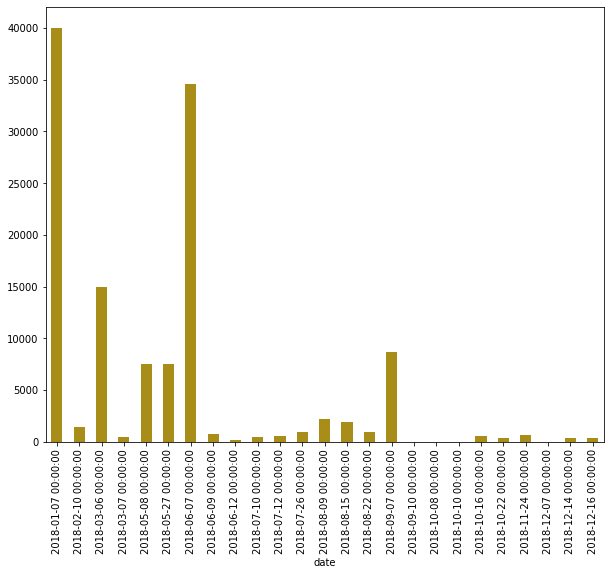

In [ ]:
daily_orders.plot.bar(figsize= (10,8),color='#a98d19')

#**Identify Monthly Orders**

In [ ]:
amz_data.head() #let's see our dataset again

,order id,items,to,date,total,postage,gift,VAT,refund,payments
0,403-3588705-7104335,Gadgets365 Earphones with Mic Compatible Oppo ...,bright,2018-12-16,324.0,Rs. 0.00,0,0,0,UNKNOWN;
1,403-1944391-0004311,Phonokart Trumpet 2 in-Ear Headphones with Uni...,bright,2018-12-14,389.0,Rs. 40.00,0,0,Rs. 389.00,UNKNOWN;
2,403-7071530-3432310,Vast Zero Power Anti Glare Clubmaster Women's ...,bright,2018-07-12,595.0,Rs. 40.00,0,0,0,Visa ending in 4760: 8 December 2018: Rs. 59...
3,408-4510123-1924335,Ten Mighty Pens;,bright,2018-06-12,182.0,Rs. 89.00,0,0,0,Visa ending in 4760: 7 December 2018: Rs. 18...
4,403-1143899-3358716,GO EYEWEAR BLUERAY BLOCK UV PROTECTED COMPUTER...,bright,2018-11-24,599.0,Rs. 0.00,0,0,Rs. 599.00,UNKNOWN;


In [ ]:
amz_data['month']= amz_data['date'].dt.month #let's get the month out of the date

In [ ]:
amz_data.head() #now we have month column added to our dataframe

,order id,items,to,date,total,postage,gift,VAT,refund,payments,month
0,403-3588705-7104335,Gadgets365 Earphones with Mic Compatible Oppo ...,bright,2018-12-16,324.0,Rs. 0.00,0,0,0,UNKNOWN;,12
1,403-1944391-0004311,Phonokart Trumpet 2 in-Ear Headphones with Uni...,bright,2018-12-14,389.0,Rs. 40.00,0,0,Rs. 389.00,UNKNOWN;,12
2,403-7071530-3432310,Vast Zero Power Anti Glare Clubmaster Women's ...,bright,2018-07-12,595.0,Rs. 40.00,0,0,0,Visa ending in 4760: 8 December 2018: Rs. 59...,7
3,408-4510123-1924335,Ten Mighty Pens;,bright,2018-06-12,182.0,Rs. 89.00,0,0,0,Visa ending in 4760: 7 December 2018: Rs. 18...,6
4,403-1143899-3358716,GO EYEWEAR BLUERAY BLOCK UV PROTECTED COMPUTER...,bright,2018-11-24,599.0,Rs. 0.00,0,0,Rs. 599.00,UNKNOWN;,11


In [ ]:
#let's group our data by month

monthly_orders = amz_data.groupby('month').sum()[" total "]
monthly_orders

month
1    40050.0
2     1399.0
3    15467.0
5    14983.0
6    35476.0
Name:  total , dtype: float64

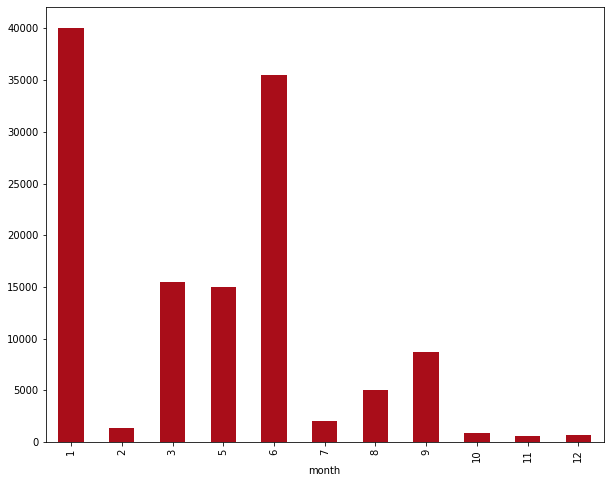

In [ ]:
monthly_orders.plot.bar(figsize= (10,8),color='#a90d19')

Now we have a much better overview in terms of which month I spend most on Amazon. This is very important when a company is trying to target customers with ADs in order to get them to spend more. Now if Amazon analyse my data, it will get to know that I am likely to spend more in January so they can recommend more items to me and be sending me emails regarding new deals. They will also get to know that during the 4th month(i.e. April), I dont mostly buy items on Amazon and therefore they will either redesign their strategies to get me to buy something in April or concentrate on other customers who are more likely to spend in the month of April. 

In the [Data Science and Machine Learning Course](https://bit.ly/3nlqfk2.), we will learn more advanced analysis and even deploy our projects live in production just like it is done in the real world industry.

We will also learn industry level data processing using Python in the [Python Data Analysis for Data Science and Machine Learning Course](https://bit.ly/2YF7hKi)